In [ ]:
!pip install git+https://github.com/octosport/octopy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/octosport/octopy.git to /tmp/pip-req-build-ohcvrjlm
  Running command git clone --filter=blob:none --quiet https://github.com/octosport/octopy.git /tmp/pip-req-build-ohcvrjlm
  Resolved https://github.com/octosport/octopy.git to commit 3f978fdfe92a232e30147122e6180aa2aa44b77a
  Preparing metadata (setup.py) ... done
  Created wheel for octopy: filename=octopy-1.0.0-py3-none-any.whl size=11754 sha256=234c9abdb5cb3b8b40367d312317409541a605d4246c1c3b4151e556a97bba13
  Stored in directory: /tmp/pip-ephem-wheel-cache-_8hkl0w5/wheels/40/71/7e/8a632c6a5a063b3ccabb6b0df75d003b2852cbc90653b2db4c
Successfully built octopy


In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from octopy.elo import dataset
from octopy.elo import elo

In [ ]:
data = pd.read_csv("/content/match-clean.csv")
data

,date,team,opponent,gf,ga
0,2017-08-11,Arsenal,Leicester City,4.0,3.0
1,2017-08-11,Leicester City,Arsenal,3.0,4.0
2,2017-08-12,Manchester City,Brighton,2.0,0.0
3,2017-08-12,Stoke City,Everton,0.0,1.0
4,2017-08-12,Brighton and Hove Albion,Manchester City,0.0,2.0
...,...,...,...,...,...
4489,2023-05-08,Fulham,Leicester City,5.0,3.0
4490,2023-05-08,Southampton,Nott'ham Forest,3.0,4.0
4491,2023-05-08,Leicester City,Fulham,3.0,5.0
4492,2023-05-08,Everton,Brighton,5.0,1.0


In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
cac

In [ ]:
#format the data
elo_data = dataset.EloDataset(valid_date= '2021-06-01',test_date= '2022-06-01',time= data['date'])

In [ ]:
#split the data
elo_data.split_train_test(data[['team','opponent']].values,data[['gf','ga']].values)

dataset split using date: train size 3040, validation size 760, test size 694


In [ ]:
#build the model and train
model = elo.EloRatingNet(elo_data.n_teams_)
model.optimise(elo_data,learning_rate=0.1)

NameError: ignored

In [ ]:
  #plot the path loss
pd.DataFrame(model.loss_path_,columns=['train','valid','test']).plot()
plt.axvline(x=model.best_params_['n_iter'],c='black',linestyle='--')

TypeError: ignored

In [ ]:
last_rating = pd.DataFrame(model.output_['carry']['rating'],index=elo_data.le_.classes_,columns=['last rating']) .sort_values('last rating',ascending=False)
last_rating

,last rating
Manchester City,1005.552612
Liverpool,1004.963379
Arsenal,1004.866638
Newcastle Utd,1004.388000
Newcastle United,1004.382996
Aston Villa,1004.205872
Manchester Utd,1004.180420
Manchester United,1004.180115
Tottenham Hotspur,1004.081299
Tottenham,1004.076416


<Axes: xlabel='date'>

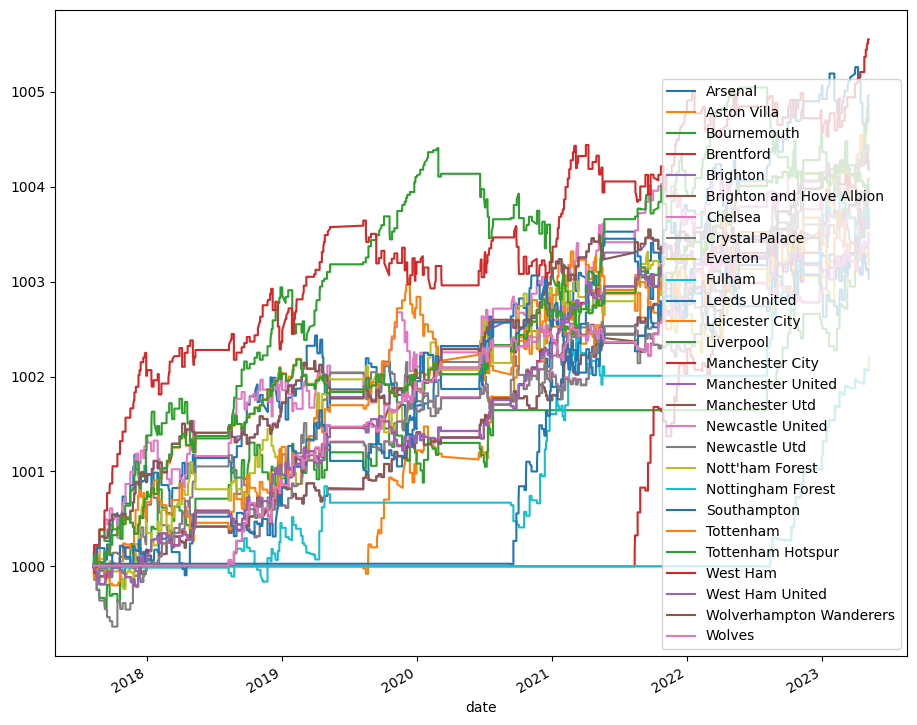

In [ ]:
import numpy as np
rating_history = pd.DataFrame(model.output_['rating'],columns=elo_data.le_.classes_,index=pd.DatetimeIndex(elo_data.time)) [  np.unique(np.concatenate(data.loc[data.date>'2022-08-01',['team','opponent']].values))]
rating_history.plot(figsize=(11, 9.5))

In [ ]:
pd.Series(model.predict_proba('Arsenal','Norwich City'))

Arsenal           0.9094739
Draw            0.055921897
Norwich City    0.034604207
dtype: object